# Modelo Probabilistico
Bruno Gil Ramirez

In [12]:
from Prob import Probabilistico, documents


# Funcion Dict_to_Table
es una funcion que le permite a un diccionario poner su informacion en una tabla.

In [13]:
import pandas as pd
def dict_to_table(d, col=None):
    # Crea un DataFrame a partir del diccionario
    df = pd.DataFrame.from_dict(d, orient='index', columns=col)
    # Redondea los valores a 4 decimales
    df = df.round(9)
    # Ordena las columnas alfabéticamente
    df = df.reindex(df.columns, axis=1)
    # Muestra la tabla en el notebook
    display(df)

# Estos son los documentos con los que se trabajara

In [11]:
dict_to_table(documents, col=['Documento'])

,Documento
d1,El perro marrón saltó sobre el Pato perezoso.
d2,El gato perezoso se en la alfombra.
d3,El perro marrón ladra al gato a menudo.
d4,El gato perezoso ignora al perro marrón.


# La clase Probabilistico
Esta clase tiene metodos para agregar documentos de tipo txt y pdf, al cargarlos al conjunto de documentos de la clase.

In [21]:
prob = Probabilistico()
prob.addDoc(documents)

# Para poder procesar una consulta
Primero hay que preprocesar los documentos de la coleccion.
el metodo **tokenize()** es escencial para esta situacion, porque tokeniza todos los textos para formar el diccionario de terminos y las pabras unicas del conjunto de documentos

In [ ]:
s=prob.tokenize()
dict_to_table(s)

# Para calcular la semejanza:
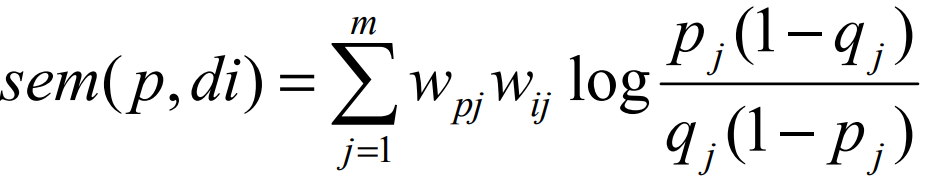

Se debe calcular la semejanza de cada token de la consulta con el del documento en cuestion, para asi Asignar los pesos de la relevancia de esa palabra en el documento con la Probabilidad condicionar de R y NR

## Al no conocer los Relevanes entonces:
- La prob de que un término esté en el conj de docs 
relevantes es la misma para todos los términos. A 
priori no hay un término más relevante que otro
    - # **$p_j = 0.5$.**
- Para qj se usa la frec inversa del término en la colección 
    - # **$q_j = \frac{f_{dj}}{N}$.**
        - **fdj**: Nº de docs con el término tj
        - **N**: Nº de docs de la colección


In [5]:
Query=prob.Query_processing("perro marrón")
print(f"Resultado de la consulta perro marrón: {Query}")
Query=prob.Query_processing("perro gato")
print(f"Resultado de la consulta perro gato: {Query}")
print(f"relevant_docs: {prob.relevant_docs}")


Resultado de la consulta perro marrón: {'d1': 1.3333333333333333, 'd3': 1.3333333333333333, 'd4': 1.3333333333333333}
Resultado de la consulta perro gato: {'d2': 0.6666666666666666, 'd3': 1.6666666666666665, 'd4': 1.6666666666666665}
relevant_docs: []


# Si conocemos los relevantes entonces:
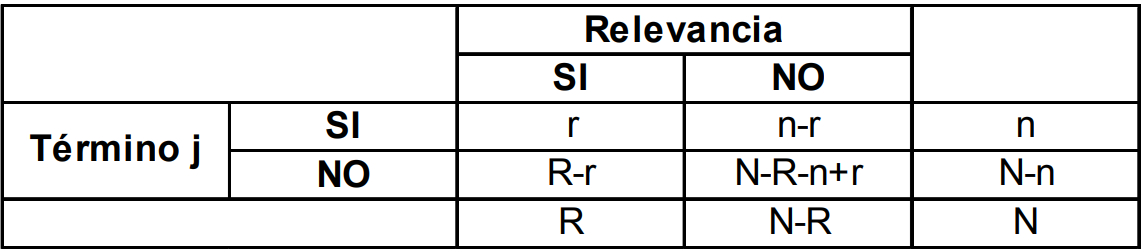
### N-R-n+r: el termino no esta en los no relevantes
### n-r: el termino si esta en los no relevantes
### r: El termino si esta en los relevantes
### R-r:El termino no esta en los relevantes

## Entonces Ahora la forma de calcular Pj y Qj, cambia
- **pj**: probabilidad de que cogiendo un doc relevante tenga tj
    - # $p_j = \frac{r}{R}$.
- **qj**: probabilidad de que en los docs no relevantes no esté tj
    - # $q_j = \frac{n-r}{N-R}$.

## Basado en la Consulta anterior
Se Observa que el documento relevante para las Palbras perro, Marron y gato fue el documento 4 o sea **d4**

In [7]:
prob.relevant_docs_from_a_survey(["d4"])
print(f"relevant_docs: {prob.relevant_docs}")
Query=prob.Query_processing("perro gato")
print(f"Resultado de la consulta perro gato: {Query}")

relevant_docs: ['d4']
Resultado de la consulta perro gato: {'d2': 1.3333333333333335, 'd3': 2.666666666666667, 'd4': 2.666666666666667}
